### Numerical differentiation
* Use taylor series expansions to approximate
* appromations include truncation error: Trancation error is loss of terms from the taylor series 

taylor series expansion
$$
\begin{aligned}
f(t+\Delta t) &= f(t)+\Delta t\frac{df(t)}{dt}+\frac{\Delta t^2}{2!} \frac{d^2f(t)}{{\Delta t}^2}+\ldots \\
\end{aligned} 
$$


** Central differce 1st derivative:**
$$ \frac{df(t)}{dt} = \frac{f(t+\Delta t) - f(t-\Delta t)}{2\Delta t}$$ 

** Forward difference 1st derivative:**
$$\frac{df(t)}{dt} = \frac{f(t+\Delta t) - f(t)}{\Delta t} + O(\Delta t^2)$$

** Backwards difference 1st derivative:**
$$\frac{df(t)}{dt} = \frac{f(t) - f(t-\Delta t)}{\Delta t} + O(\Delta t^2)$$

** Central difference 2nd derivative: **
$$\frac{d^2f(t)}{dt^2} = \frac{f(t+\Delta t) -2 f(t) + f(t-\Delta t)}{\Delta t^2} + O(\Delta t^2)$$

Other finite difference formulas: https://en.wikipedia.org/wiki/Finite_difference_coefficient

**Error in numerical differentiation:**
$O(\Delta t^2)$
* above term represents summation of neglected terms
* truncation error is reduced with finer discritization (smaller $\Delta t$)
* but at some point roundoff error will start to increase
* For float64 double precision, most accurate results achieved using step size $h = 10^{-4}$ which is $10^{-4} \approx \sqrt[4]{\epsilon_M}$


In [13]:
# More advanced derivative techniques
import autograd

position = lambda x: x**3
x1 = 2.
accel = autograd.grad(position)

print(accel(x1))  # print acceleration value at x1 = 2. 

12.0


In [ ]:
### Python built in differentiation:

import numpy as np

position = [5, 2, 1]  # velocity expressed as polynomial x = 5t^2 + 2t + 1
velocity = np.polyder(position)
print(velocity)  # velocity expressed as polynomial x = 10t +2

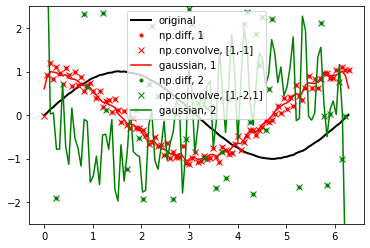

In [9]:
## copy and pasted from random source, could be useful in the future

import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

#Data:
x = np.linspace(0,2*np.pi,100)
f = np.sin(x) + .02*(np.random.rand(100)-.5)

#Normalization:
dx = x[1] - x[0] # use np.diff(x) if x is not uniform
dxdx = dx**2

#First derivatives:
df = np.diff(f) / dx
cf = np.convolve(f, [1,-1],'same') / dx
gf = ndimage.gaussian_filter1d(f, sigma=1, order=1, mode='wrap') / dx

#Second derivatives:
ddf = np.diff(f, 2) / dxdx
ccf = np.convolve(f, [1, -2, 1],'same') / dxdx
ggf = ndimage.gaussian_filter1d(f, sigma=1, order=2, mode='wrap') / dxdx

#Plotting:
plt.figure()
plt.plot(x, f, 'k', lw=2, label='original')
plt.plot(x[1:], df, 'r.', label='np.diff, 1')
plt.plot(x, cf, 'rx', label='np.convolve, [1,-1]')
plt.plot(x, gf, 'r', label='gaussian, 1')
plt.plot(x[1:-1], ddf, 'g.', label='np.diff, 2')
plt.plot(x, ccf, 'gx', label='np.convolve, [1,-2,1]')
plt.plot(x, ggf, 'g', label='gaussian, 2')
plt.ylim([-2.5, 2.5])
plt.legend()

Text(0.5, 1.0, 'second derivative')

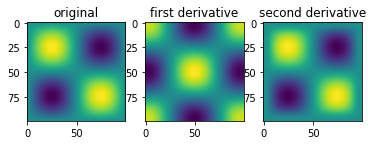

In [10]:
from scipy import ndimage

x = np.linspace(0,2*np.pi,100)
sine = np.sin(x)

im = sine * sine[...,None]
d1 = ndimage.gaussian_filter(im, sigma=5, order=1, mode='wrap')
d2 = ndimage.gaussian_filter(im, sigma=5, order=2, mode='wrap')

plt.figure()

plt.subplot(131)
plt.imshow(im)
plt.title('original')

plt.subplot(132)
plt.imshow(d1)
plt.title('first derivative')

plt.subplot(133)
plt.imshow(d2)
plt.title('second derivative')

### Differentiation
<br> Gives rate of change of the function
<br> Linear approximation can still be written as $f(x+h) \approx f(x) + f'(x) \; h$ 
<br> Using multi-variable taylor series the linear approximation can be written as a nxm array of partial derivatives called the jacobian matrix

$$
f(x+h) \approx f(x) + 
\begin{bmatrix}
\frac{\partial f_0}{\partial x_0} & \frac{\partial f_0}{\partial x_1} & \cdots & \frac{\partial f_0}{\partial x_{m-1}} \\
\vdots & \vdots & \cdots & \vdots \\
\frac{\partial f_{n-1}}{\partial x_0} & \frac{\partial f_{n-1}}{\partial x_1} & \cdots & \frac{\partial f_{n-1}}{\partial x_{m-1}} \\
\end{bmatrix}
\begin{bmatrix}
h_0 \\
h_1 \\
\vdots \\
h_{m-1}
\end{bmatrix}
= f(x) + J(f;x) \; h
$$

If f has just a single compoent, then 

$$
f(x+h) \approx f(x) + 
\begin{pmatrix}
\frac{\partial f}{\partial x_0} & \frac{\partial f}{\partial x_1} & \cdots & \frac{\partial f}{\partial x_{m-1}}
\end{pmatrix}
\begin{bmatrix}
h_0 \\
h_1 \\
\vdots \\
h_{m-1}
\end{bmatrix}
$$

Derivative of a matrix time a vector: $f(x+h) \approx f(x) + f'(x) \; h$ 

$f(x) = A x \implies f(x+h) = A(x+h) = Ax + Ah \implies f'(x) = A$

Derivative of a Quadratic form:
<br> $ f(x) = x^T A x$
<br> Let $y = A x$ so $f(x,y(x)) = x^T y(x) = y(x)^T x$

$\begin{aligned}
f'(x,y(x)) &= \frac{\partial f}{\partial x} &+ &\frac{\partial f}{\partial y} y'(x) \\
&= y(x)^T &+ &x^T \; A \\
&= (Ax)^T &+ &x^T \; A &= x^T A^T + x^T A &= \boxed{x^T (A^T + A) = (x^T A x)'}
\end{aligned}$



### Gradient and steepest decent
<br> A different approach to linear solvers is to follow gradient to inflection point for solution. 
<br> $(\nabla f)^T = 0 \implies \nabla f = 0 \,(= 0^T \,)$ 
<br>Generic quadratic form: $f(x) = \frac{1}{2} x^T A x - b^T x + c$

and the gradient is: $\nabla f(x) = \frac{1}{2} A^T x + \frac{1}{2} A x - b$

**Symetric A matrix:** $A^T = A$ and the condition at the critical point is:

$\nabla f(x) = A x - b = 0$ 

Critical point of the quadratic coincides with the solution of symmetric linear system.

**Positive Definite:**
* When function is shapped like a bowl
* Critirical point is a minium
* must seek solution by moving "down" to critical point 

**Non-symetric A matrix:**
* gradient descent seeks the solution of $\frac{1}{2} (A^T + A) x = b$. 
<br>For non-square $A$, it can be helpful to multiply by $A^T$ to get __normal equations__ $A^T A x = A^T b$. 
<br>The matrix $A^T A$ is symmetric and positive definite, so descent methods can be applied:
<br>$\implies$__Least Squares solution__ (that minimixes the least squared error $|| A x - b ||^2$)

In [ ]:
# Sample of finding best fit line
# y = m*x + b

import numpy as np 

x = np.array([2, 3, 5, 7, 9])
y = np.array([4, 5, 7, 10, 15])
A0 = np.column_stack([x, np.ones([5])])

# to get square normal system
A = np.dot(A0.T, A0)
b = np.dot(A0.T, y)

slope, intercept = np.linalg.solve(A, b)
print("Best fit line is y = %6.2f * x + %6.2f" %(slope, intercept))

**Quadratic function and gradient**
* Ensures normal matric is symetric
* Solution found by minimizing quadratic form

$$ f(x) = \frac{1}{2} x^T A x - b^T x$$

In [ ]:
# sample functions to compute quadratic function and gradient

def f(x,A,b):
    y = np.dot(A,x)
    return 0.5*np.dot(x,y) - np.dot(b,x)

def fxy(x,y):
    return 0.5*(168*x**2+52*x*y+5*y**2)-(263*x+41*y)

def grad_f(x):
    g0 = 168*x[0] + 26 * x[1] - 263
    g1 = 26*x[0] + 5*x[1] - 41
    return np.array([g0,g1])

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
x = np.linspace(1,2, 10)
y = np.linspace(0,0.5, 10)
X, Y = np.meshgrid(x, y)
Z = fxy(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('f')
ax.set_zlim(bottom=-200,top=-185)
ax.set_title('wireframe');
plt.show(fig)

###Gradient Descent Method

**Finding solution via minimum**
* positive definie matrix since $A^T A$ is positive

**Steps**

1. Make initial guess `x[0]`
2. For given extimate `x[i]`
3. Compute gradient `grad_f(x[i])` to determine steepest directions
4. Move towards miniumum to get improved solution `x[i+1] = x[i] - c *grad_f(x[i])`
5. If `np.norm(x[i+1]-x[i]) > tol` repeat from step 2; else `return x[i+1]`


In [ ]:
x0 = np.array([0,0])
A, b, f(x0,A,b), grad_f(x0)

In [ ]:
def descent_update_const(x, c):
    return x - c*grad_f(x)

In [ ]:
# previously solved to get [1.52, 0.30]
c = 0.01
n = 15
x = x0
for i in range(n):
    x = descent_update_const(x, c)
    print(x)